In [1]:
import numpy as np
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tf_keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:

# load the preprocessed data of training
x_train = np.load("../data/numpy/X_train.npy")
y_train = np.load("../data/numpy/Y_train.npy")


In [2]:
# load the preprocessed data of test
x_test = np.load("../data/numpy/X_test.npy")
y_test = np.load("../data/numpy/Y_test.npy")


In [ ]:

print(y_train.shape)
print(x_train.shape)


(8005,)
(8005, 224, 224, 3)


In [ ]:
print(y_train)
x_train[:6]

[0 0 0 ... 1 1 1]


array([[[[0.1569  , 0.1726  , 0.153   ],
         [0.1647  , 0.1726  , 0.1569  ],
         [0.1726  , 0.1765  , 0.1608  ],
         ...,
         [0.71    , 0.8115  , 0.8276  ],
         [0.6626  , 0.788   , 0.8     ],
         [0.639   , 0.7764  , 0.788   ]],

        [[0.1608  , 0.1765  , 0.1569  ],
         [0.1647  , 0.1726  , 0.1569  ],
         [0.1686  , 0.1765  , 0.1608  ],
         ...,
         [0.682   , 0.784   , 0.8     ],
         [0.651   , 0.7725  , 0.784   ],
         [0.6313  , 0.7607  , 0.7764  ]],

        [[0.1569  , 0.1726  , 0.153   ],
         [0.1608  , 0.1686  , 0.153   ],
         [0.1608  , 0.1647  , 0.149   ],
         ...,
         [0.6626  , 0.757   , 0.7725  ],
         [0.647   , 0.7607  , 0.7803  ],
         [0.651   , 0.7725  , 0.792   ]],

        ...,

        [[0.1137  , 0.1098  , 0.1177  ],
         [0.102   , 0.0941  , 0.102   ],
         [0.0863  , 0.08234 , 0.0902  ],
         ...,
         [0.098   , 0.1216  , 0.1726  ],
         [0.08234 , 0.

In [4]:
# model architecture(?) structure(?) baw
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 173056)           

In [5]:
# model training

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs=10,batch_size = 10,validation_data = (x_test,y_test))

_, accuracy = model.evaluate(x_test,y_test)
print("Accuracy: %.2f" % (accuracy*100))


Epoch 1/10


801/801 [==============================] - 181s 225ms/step - loss: 0.7286 - accuracy: 0.5228 - val_loss: 0.6935 - val_accuracy: 0.5418
Epoch 2/10
801/801 [==============================] - 179s 223ms/step - loss: 0.6918 - accuracy: 0.5539 - val_loss: 0.6722 - val_accuracy: 0.5927
Epoch 3/10
801/801 [==============================] - 177s 221ms/step - loss: 0.6804 - accuracy: 0.5815 - val_loss: 0.6827 - val_accuracy: 0.6036
Epoch 4/10
801/801 [==============================] - 178s 222ms/step - loss: 0.6473 - accuracy: 0.6505 - val_loss: 0.6080 - val_accuracy: 0.6718
Epoch 5/10
801/801 [==============================] - 179s 224ms/step - loss: 0.6107 - accuracy: 0.6868 - val_loss: 0.6361 - val_accuracy: 0.6723
Epoch 6/10
801/801 [==============================] - 179s 223ms/step - loss: 0.5967 - accuracy: 0.7048 - val_loss: 0.6843 - val_accuracy: 0.6139
Epoch 7/10
801/801 [==============================] - 180s 225ms/step - loss: 0.5717 - accuracy: 0.7267 - val_loss: 0.626

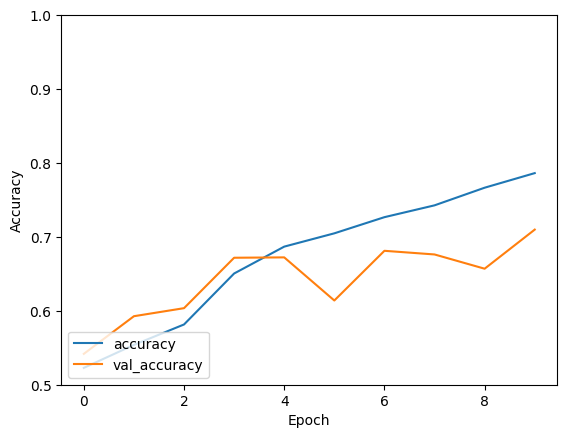

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')   
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower left')

# test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)